In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-adapt-motive)

This function gets increasingly oscillatory as $x$ increases.

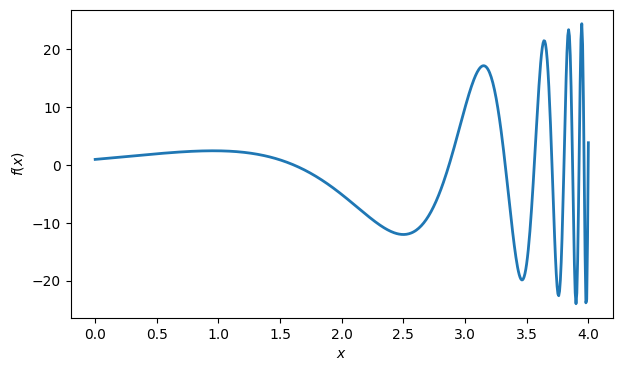

In [2]:
f = lambda x: (x + 1) ** 2 * cos((2 * x + 1) / (x - 4.3))
x = linspace(0, 4, 600)
plot(x, f(x))
xlabel("$x$")
ylabel("$f(x)$");

Accordingly, the trapezoid rule is more accurate on the left half of this interval than on the right half.

In [15]:
n = 50 * 2 ** arange(4)
Tleft = zeros(4)
Tright = zeros(4)
for k in range(len(n)):
    Tleft[k], _, _ = FNC.trapezoid(f, 0, 2, n[k])
    Tright[k], _, _ = FNC.trapezoid(f, 2, 4, n[k])
results = PrettyTable()
results.add_column("n", n)
results.add_column("left side", Tleft)
results.add_column("right side", Tright)
print(results)

'<table>\n    <thead>\n        <tr>\n            <th>n</th>\n            <th>left side</th>\n            <th>right side</th>\n        </tr>\n    </thead>\n    <tbody>\n        <tr>\n            <td>50</td>\n            <td>2.0041912243977023</td>\n            <td>-4.327986370465979</td>\n        </tr>\n        <tr>\n            <td>100</td>\n            <td>2.006059574093049</td>\n            <td>-4.736211288669688</td>\n        </tr>\n        <tr>\n            <td>200</td>\n            <td>2.006526613344454</td>\n            <td>-4.809668389494285</td>\n        </tr>\n        <tr>\n            <td>400</td>\n            <td>2.0066433701440323</td>\n            <td>-4.82666143974999</td>\n        </tr>\n    </tbody>\n</table>'

In [16]:
from scipy.integrate import quad
left_val, err = quad(f, 0, 2, epsabs=1e-13, epsrel=1e-13)
right_val, err = quad(f, 2, 4, epsabs=1e-13, epsrel=1e-13)
results = PrettyTable()
results.add_column("n", n)
results.add_column("left error", Tleft - left_val)
results.add_column("right error", Tright - right_val)
print(results)

+-----+-------------------------+----------------------+
|  n  |        left error       |     right error      |
+-----+-------------------------+----------------------+
|  50 |  -0.0024910644116191705 |  0.5042292917807911  |
| 100 |  -0.0006227147162722879 | 0.09600437357708191  |
| 200 |  -0.0001556754648674996 | 0.022547272752484915 |
| 400 | -3.8918665289155996e-05 | 0.00555422249678017  |
+-----+-------------------------+----------------------+


Both the picture and the numerical results suggest that more nodes should be used on the right half of the interval than on the left half.